In [115]:
!pip install pandas matplotlib seaborn

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
df_comp = pd.read_csv('comp.csv')
df_round = pd.read_csv('round.csv')
df_inv = pd.read_csv('inv.csv')
df_acq = pd.read_csv('acq.csv')
df_addition = pd.read_csv('addition.csv')

In [118]:
print("Companies:", df_comp.shape)
print(df_comp.columns)
print("\nRounds:", df_round.shape)
print(df_round.columns)
print("\nInvestments:", df_inv.shape)
print(df_inv.columns)
print("\nAcquisitions:", df_acq.shape)
print(df_acq.columns)

Companies: (13826, 14)
Index(['permalink', 'name', 'homepage_url', 'category_list',
       'funding_total_usd', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'first_funding_at',
       'last_funding_at'],
      dtype='object')

Rounds: (8861, 12)
Index(['company_permalink', 'company_name', 'company_category_list',
       'company_country_code', 'company_state_code', 'company_region',
       'company_city', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd'],
      dtype='object')

Investments: (14323, 18)
Index(['company_permalink', 'company_name', 'company_category_list',
       'company_country_code', 'company_state_code', 'company_region',
       'company_city', 'investor_permalink', 'investor_name',
       'investor_country_code', 'investor_state_code', 'investor_region',
       'investor_city', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 

In [119]:
# Merging rounds with companies
df_rounds_merged = df_round.merge(
    df_comp,
    left_on='company_permalink',
    right_on='permalink',
    how='left'
)

# Checking the merged result
df_rounds_merged.head()

,company_permalink,company_name,company_category_list,company_country_code,company_state_code,company_region,company_city,funding_round_permalink,funding_round_type,funding_round_code,...,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,Media,IND,16,Mumbai,Mumbai,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,...,10000000,operating,IND,16,Mumbai,Mumbai,1.0,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA,DE,DE - Other,Delaware City,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,...,700000,operating,USA,DE,DE - Other,Delaware City,2.0,2014-09-04,2014-03-01,2014-10-14
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA,DE,DE - Other,Delaware City,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,...,700000,operating,USA,DE,DE - Other,Delaware City,2.0,2014-09-04,2014-03-01,2014-10-14
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,...,3406878,operating,NaN,NaN,NaN,NaN,1.0,NaN,2014-01-30,2014-01-30
4,/organization/0-6-com,0-6.com,Curated Web,CHN,22,Beijing,Beijing,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,...,2000000,operating,CHN,22,Beijing,Beijing,1.0,2007-01-01,2008-03-19,2008-03-19


In [120]:
print(df_rounds_merged.columns)

Index(['company_permalink', 'company_name', 'company_category_list',
       'company_country_code', 'company_state_code', 'company_region',
       'company_city', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd', 'permalink',
       'name', 'homepage_url', 'category_list', 'funding_total_usd', 'status',
       'country_code', 'state_code', 'region', 'city', 'funding_rounds',
       'founded_at', 'first_funding_at', 'last_funding_at'],
      dtype='object')


In [121]:
df_rounds_merged_clean = df_rounds_merged[~df_rounds_merged['raised_amount_usd'].isnull()]

In [122]:
df_rounds_merged_clean[['raised_amount_usd']].isnull().sum()

,0
raised_amount_usd,0


In [123]:
df_rounds_merged_clean['raised_amount_usd'] = pd.to_numeric(
    df_rounds_merged_clean['raised_amount_usd'],
    errors='coerce'
)

/tmp/ipython-input-123-3380496315.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rounds_merged_clean['raised_amount_usd'] = pd.to_numeric(


In [124]:
df_funding_summary = df_rounds_merged_clean.groupby('company_permalink').agg({
    'raised_amount_usd': 'sum',
    'funding_round_type': 'count',
    'founded_at': 'first',
    'company_category_list': 'first',
    'company_country_code': 'first',
    'company_name': 'first'
}).reset_index()

In [125]:
df_funding_summary.rename(columns={
    'raised_amount_usd': 'total_funding_usd',
    'funding_round_type': 'number_of_rounds',
    'founded_at': 'founded_at',
    'company_category_list': 'industry',
    'company_country_code': 'country',
    'company_name': 'company_name'
}, inplace=True)

In [126]:
df_funding_summary['founded_year'] = pd.to_datetime(
    df_funding_summary['founded_at'], errors='coerce'
).dt.year

In [127]:
df_funding_summary['company_age'] = 2025 - df_funding_summary['founded_year']

In [128]:
df_funding_summary[['total_funding_usd', 'number_of_rounds', 'company_age']].describe()

,total_funding_usd,number_of_rounds,company_age
count,4.091000e+03,4091.000000,3151.000000
mean,2.012665e+07,1.803471,18.352586
std,1.004372e+08,1.443474,10.204687
min,0.000000e+00,1.000000,10.000000
25%,5.000000e+05,1.000000,13.000000
50%,2.740000e+06,1.000000,16.000000
75%,1.322500e+07,2.000000,21.000000
max,4.812000e+09,15.000000,162.000000


In [129]:
# Count investors per company
df_investor_counts = df_inv.groupby('company_permalink').agg({
    'investor_name': 'count'
}).reset_index()

df_investor_counts.rename(columns={
    'investor_name': 'number_of_investors'
}, inplace=True)

# Merge back
df_funding_summary = df_funding_summary.merge(
    df_investor_counts,
    on='company_permalink',
    how='left'
)

# Fill NaN investors with 0
df_funding_summary['number_of_investors'] = df_funding_summary['number_of_investors'].fillna(0)

In [130]:
df_funding_summary[['total_funding_usd', 'number_of_rounds', 'company_age', 'number_of_investors']].isnull().sum()

,0
total_funding_usd,0
number_of_rounds,0
company_age,940
number_of_investors,0


In [131]:
# Calculate safe denominators
max_funding = df_funding_summary['total_funding_usd'].max() or 1
max_rounds = df_funding_summary['number_of_rounds'].max() or 1
max_investors = df_funding_summary['number_of_investors'].max() or 1
max_age = df_funding_summary['company_age'].max() or 1

# Normalize each score to 0-100
df_funding_summary['funding_score'] = (
    df_funding_summary['total_funding_usd'] / max_funding
) * 100

df_funding_summary['rounds_score'] = (
    df_funding_summary['number_of_rounds'] / max_rounds
) * 100

df_funding_summary['investor_score'] = (
    df_funding_summary['number_of_investors'] / max_investors
) * 100

df_funding_summary['age_score'] = (
    df_funding_summary['company_age'] / max_age
) * 100

In [132]:
# Calculating VC Fit Score

In [133]:
df_funding_summary['vc_fit_score'] = (
    0.4 * df_funding_summary['funding_score'] +
    0.3 * df_funding_summary['rounds_score'] +
    0.2 * df_funding_summary['investor_score'] +
    0.1 * df_funding_summary['age_score']
)

In [134]:
df_funding_summary[['vc_fit_score']].describe()

,vc_fit_score
count,3151.000000
mean,6.446752
std,5.013542
min,2.617284
25%,3.249145
50%,4.703119
75%,7.639548
max,63.297246


In [135]:
#Ranking top companies

In [136]:
df_top = df_funding_summary.sort_values('vc_fit_score', ascending=False)
df_top[['company_name', 'industry', 'country', 'vc_fit_score']].head(10)

,company_name,industry,country,vc_fit_score
1995,Alibaba,E-Commerce,CHN,63.297246
1723,Airbnb,Hotels|Travel,USA,53.110295
2874,Aperto Networks,Mobile|Wireless,USA,52.937272
917,ACTIVE Network,Software,USA,37.616328
1797,AirXpanders,Biotechnology,USA,36.061081
851,Actelis Networks,Internet|Software|Web Hosting,USA,35.534190
2699,Ola,Automotive|E-Commerce|Internet|Mobile|Mobile C...,IND,34.708386
2961,Appcelerator,Enterprise Software|Mobile|Mobility|Open Source,USA,34.518897
2000,Alien Technology,Semiconductors,USA,34.316807
288,4INFO,Ad Targeting|Big Data Analytics|Mobile Adverti...,USA,31.881784


In [137]:
# Distribution of VC Fit scores

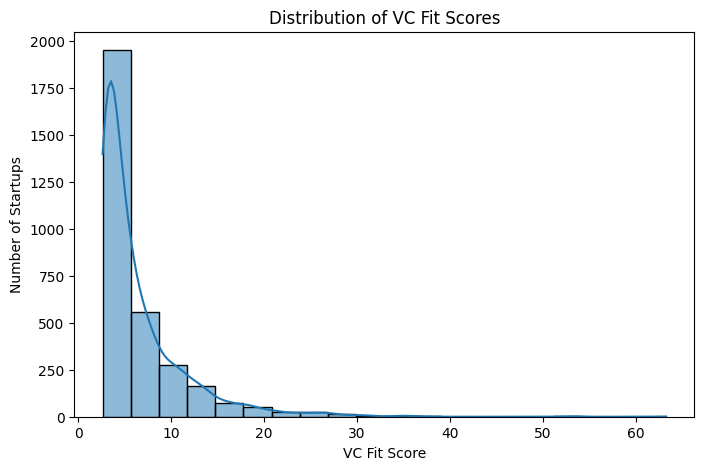

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df_funding_summary['vc_fit_score'], bins=20, kde=True)
plt.title("Distribution of VC Fit Scores")
plt.xlabel("VC Fit Score")
plt.ylabel("Number of Startups")
plt.show()

In [139]:
# Founders vs Investors

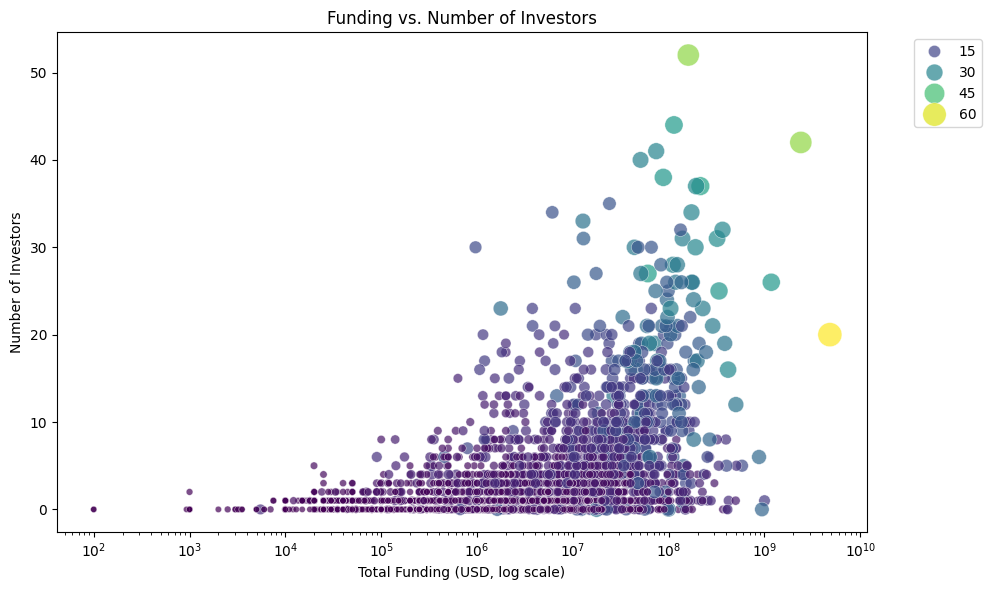

In [140]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_funding_summary,
    x="total_funding_usd",
    y="number_of_investors",
    size="vc_fit_score",
    hue="vc_fit_score",
    palette="viridis",
    sizes=(20, 300),
    alpha=0.7
)
plt.xscale("log")
plt.title("Funding vs. Number of Investors")
plt.xlabel("Total Funding (USD, log scale)")
plt.ylabel("Number of Investors")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.tight_layout()
plt.show()

In [141]:
# VC Fit Score by Industry

/tmp/ipython-input-142-708648726.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


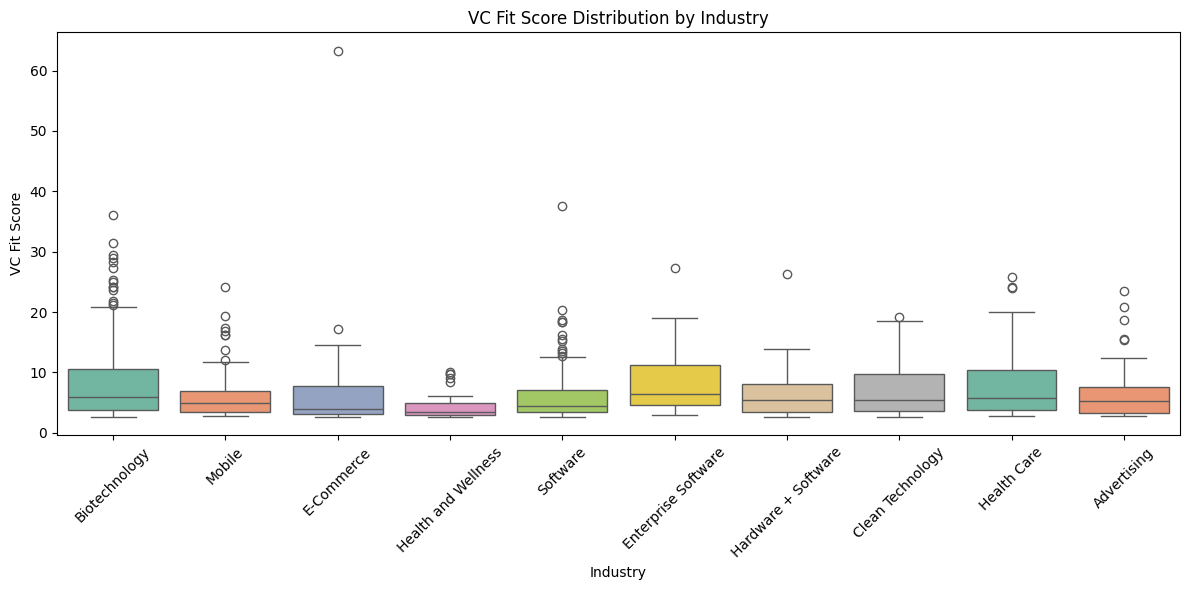

In [142]:
# Keeping top industries only
top_industries = df_funding_summary['industry'].value_counts().head(10).index
df_top_industries = df_funding_summary[df_funding_summary['industry'].isin(top_industries)]

plt.figure(figsize=(12,6))
sns.boxplot(
    data=df_top_industries,
    x="industry",
    y="vc_fit_score",
    palette="Set2"
)
plt.xticks(rotation=45)
plt.title("VC Fit Score Distribution by Industry")
plt.xlabel("Industry")
plt.ylabel("VC Fit Score")
plt.tight_layout()
plt.show()

In [143]:
# Top 20 Companies

/tmp/ipython-input-144-594537680.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


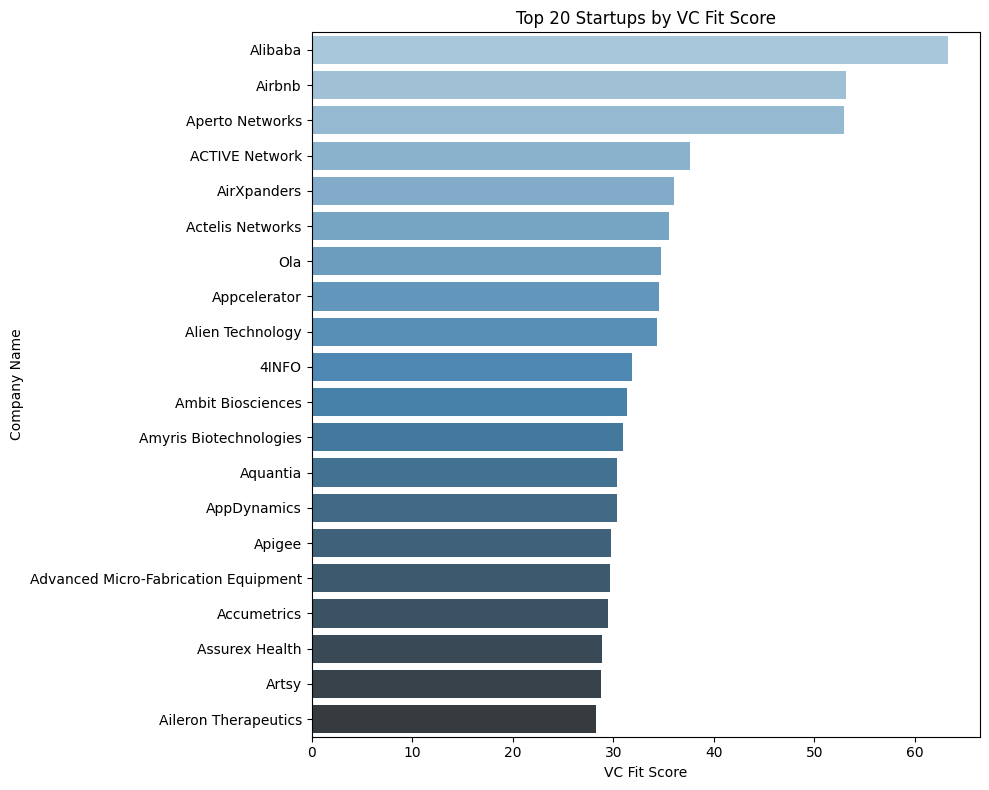

In [144]:
top_20 = df_funding_summary.sort_values("vc_fit_score", ascending=False).head(20)

plt.figure(figsize=(10,8))
sns.barplot(
    data=top_20,
    y="company_name",
    x="vc_fit_score",
    palette="Blues_d"
)
plt.title("Top 20 Startups by VC Fit Score")
plt.xlabel("VC Fit Score")
plt.ylabel("Company Name")
plt.tight_layout()
plt.show()

In [145]:
# Correlation of Numeric values to VC Fit Score

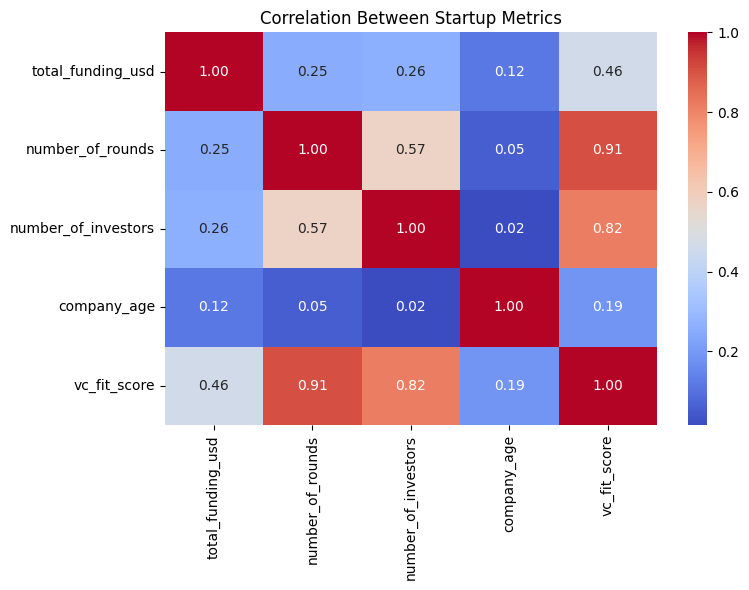

In [146]:
plt.figure(figsize=(8,6))
sns.heatmap(
    df_funding_summary[[
        "total_funding_usd",
        "number_of_rounds",
        "number_of_investors",
        "company_age",
        "vc_fit_score"
    ]].corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Correlation Between Startup Metrics")
plt.tight_layout()
plt.show()

In [147]:
# Company Age vs Funding

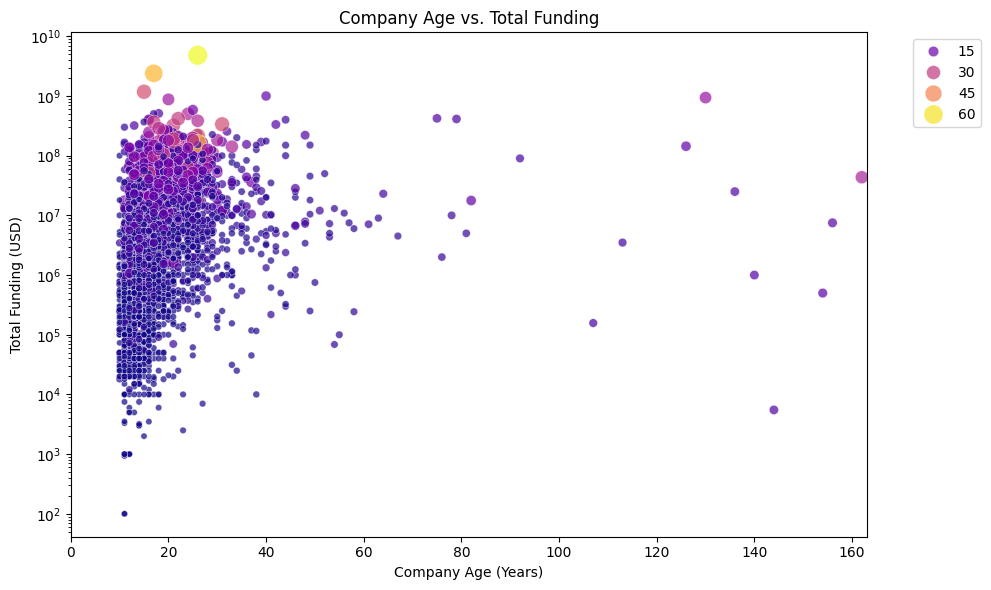

In [148]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_funding_summary,
    x="company_age",
    y="total_funding_usd",
    hue="vc_fit_score",
    size="vc_fit_score",
    sizes=(20,200),
    palette="plasma",
    alpha=0.7
)
plt.title("Company Age vs. Total Funding")
plt.xlabel("Company Age (Years)")
plt.ylabel("Total Funding (USD)")
plt.xlim(0, df_funding_summary['company_age'].max() + 1)
plt.yscale("log")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.tight_layout()
plt.show()

In [149]:
#Analyzing M&A's

In [150]:
# 1. Create list of acquired companies
acquired_companies = df_acq['company_permalink'].unique()

# 2. Flag acquired companies in the main dataset
df_funding_summary['was_acquired'] = df_funding_summary['company_permalink'].isin(acquired_companies).astype(int)

# 3. Aggregate total acquisition price
acq_prices = df_acq.groupby('company_permalink')['price_amount'].sum().reset_index()
acq_prices.rename(columns={'price_amount': 'total_acquisition_price'}, inplace=True)

# 4. Merge the acquisition price into your summary
df_funding_summary = df_funding_summary.merge(
    acq_prices,
    on='company_permalink',
    how='left'
)

# 5. Fill missing acquisition price with 0
df_funding_summary['total_acquisition_price'] = df_funding_summary['total_acquisition_price'].fillna(0)

In [151]:
df_funding_summary[['was_acquired', 'total_acquisition_price']].describe()

,was_acquired,total_acquisition_price
count,4091.000000,4.091000e+03
mean,0.101687,1.464575e+07
std,0.302273,1.704046e+08
min,0.000000,0.000000e+00
25%,0.000000,0.000000e+00
50%,0.000000,0.000000e+00
75%,0.000000,0.000000e+00
max,1.000000,5.700000e+09


/tmp/ipython-input-152-2013824568.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


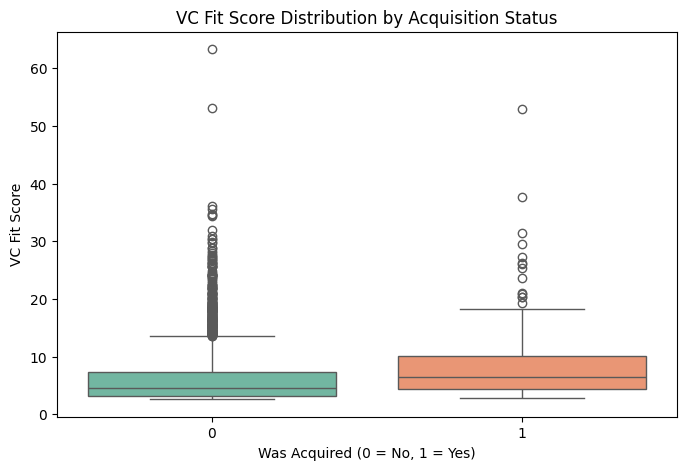

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(
    data=df_funding_summary,
    x="was_acquired",
    y="vc_fit_score",
    palette="Set2"
)
plt.xlabel("Was Acquired (0 = No, 1 = Yes)")
plt.ylabel("VC Fit Score")
plt.title("VC Fit Score Distribution by Acquisition Status")
plt.show()

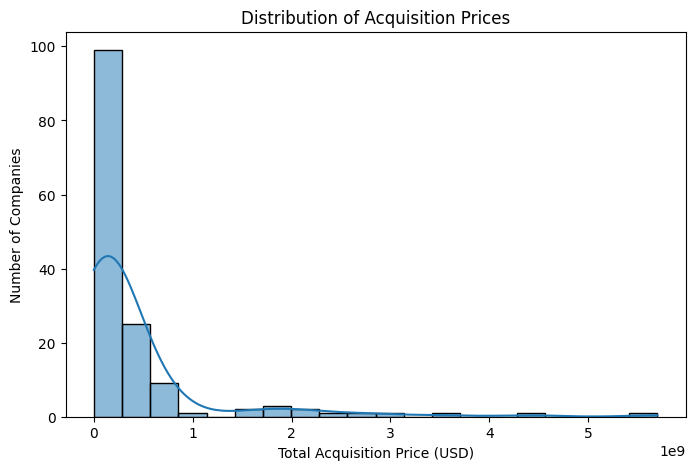

In [153]:
plt.figure(figsize=(8,5))
sns.histplot(
    df_funding_summary[df_funding_summary['total_acquisition_price'] > 0]['total_acquisition_price'],
    bins=20,
    kde=True
)
plt.xlabel("Total Acquisition Price (USD)")
plt.ylabel("Number of Companies")
plt.title("Distribution of Acquisition Prices")
plt.show()

In [154]:
# Rewarding companies that have been acquired (as an indicator of success)

In [155]:
df_funding_summary['vc_fit_score_adjusted'] = df_funding_summary['vc_fit_score'] + (df_funding_summary['was_acquired'] * 10)

In [156]:
df_top_adjusted = df_funding_summary.sort_values('vc_fit_score_adjusted', ascending=False)
df_top_adjusted[['company_name', 'vc_fit_score', 'vc_fit_score_adjusted', 'was_acquired']].head(10)

,company_name,vc_fit_score,vc_fit_score_adjusted,was_acquired
1995,Alibaba,63.297246,63.297246,0
2874,Aperto Networks,52.937272,62.937272,1
1723,Airbnb,53.110295,53.110295,0
917,ACTIVE Network,37.616328,47.616328,1
2359,Ambit Biosciences,31.384352,41.384352,1
741,Accumetrics,29.479059,39.479059,1
3130,Approva,27.312865,37.312865,1
3476,Aristos Logic,26.285700,36.285700,1
2757,Answers Corporation,26.108059,36.108059,1
1797,AirXpanders,36.061081,36.061081,0
